## Plain Gradient Descent with Fixed Learning Rate

We consider the Mean Squared Error (MSE) cost function for Ordinary Least Squares (OLS) regression:

$$ C(\beta) = \frac{1}{n}(\mathbf{X}\beta - \mathbf{y})^T(\mathbf{X}\beta - \mathbf{y}) $$

The analytical gradient is given by:

$$ \nabla C(\beta) = \frac{2}{n}\mathbf{X}^T(\mathbf{X}\beta - \mathbf{y}) $$

The parameter update rule for plain gradient descent is:

$$ \beta = \beta - \eta \nabla C(\beta) $$

where $ \eta $ is the learning rate.


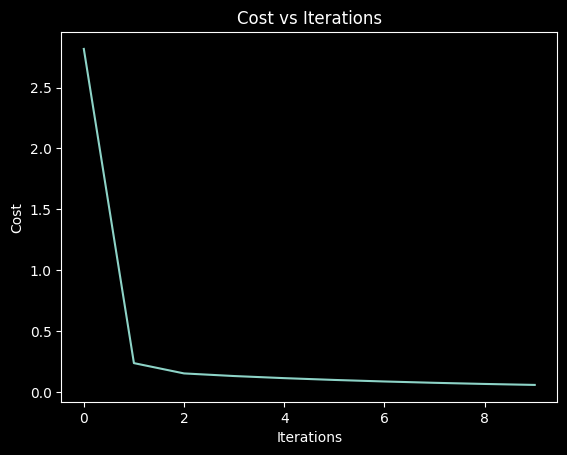

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def generate_data(n_samples):
    x = np.linspace(0, 1, n_samples)
    y = 1 + 2*x + 3*x**2 +np.random.normal(0, 0.1, n_samples)
    return x, y

x, y = generate_data(1000)
X = np.column_stack((np.ones(len(x)), x, x**2))
y = y.reshape(-1, 1)

learning_rate = 0.3
n_iterations = 10

beta = np.random.randn(X.shape[1], 1)
cost_history = []

for i in range(n_iterations):
    y_pred = X @ beta
    error = y_pred - y
    cost = (1 / len(y)) * np.sum(error**2)
    cost_history.append(cost)
    gradient = (2 / len(y)) * X.T @ error
    beta -= learning_rate * gradient

plt.plot(range(n_iterations), cost_history, label="Plain GD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

### Newton's Method Using the Hessian Matrix

While gradient descent uses first-order derivatives to find the minimum of a function, Newton's method leverages second-order derivatives (the Hessian matrix) for potentially faster convergence.

The update rule for Newton's method is:

$$ \beta = \beta - H^{-1}(\beta) \nabla C(\beta) $$

where:

- $\nabla C(\beta)$ is the gradient vector.
- $H(\beta) $ is the Hessian matrix of second derivatives.

For the MSE cost function in OLS regression, the Hessian matrix is given by:

$$ H(\beta) = \frac{2}{n} \mathbf{X}^T \mathbf{X} $$

Newton's method can achieve quadratic convergence near the optimum, but it requires computation of the Hessian and its inverse, which can be computationally intensive for large datasets.

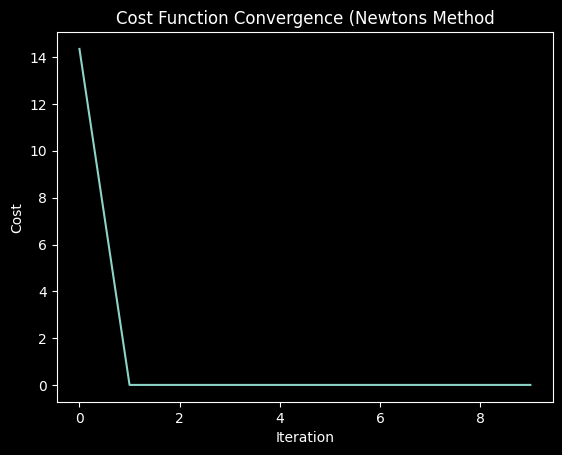

Final beta coefficients (Newton's Method):
[[1.01411532]
 [1.96316586]
 [3.01954511]]


In [2]:
beta_newton = np.random.randn(X.shape[1], 1)
n_iterations_newton = 10
cost_history_newton = []

# Precompute the Hessian matrix and its inverse
H = (2 / len(y)) * X.T @ X
H_inv = np.linalg.inv(H)

### Using the eigen value of Hessian matrix to calculate the learning rate
### Instead of using the inverse of the Hessian matrix
# H_eign_values, H_Eign_vec = np.linalg.eig(H)
# max_eign = np.max(H_eign_values)
# inver_max_eign = 1 / max_eign

for i in range(n_iterations_newton):
    y_pred = X @ beta_newton
    error = y_pred - y
    cost = (1 / len(y)) * np.sum(error**2)
    cost_history_newton.append(cost)
    gradient = (2 / len(y)) * X.T @ error
    beta_newton -= H_inv @ gradient
    # beta_newton -= inver_max_eign * gradient

plt.plot(range(n_iterations_newton), cost_history_newton)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (Newtons Method")
plt.show()

print("Final beta coefficients (Newton's Method):")
print(beta_newton)

## Adding Momentum to Gradient Descent
To accelerate convergence, we can add **momentum** to the gradient descent algorithm. Momentum helps by considering the previous update's direction and magnitude, smoothing out the updates, and potentially leading to faster convergence.

The momentum update equations are:

$$ v_t = \gamma v_{t-1} + \eta \nabla C(\beta) $$
$$ \beta = \beta - v_t $$

where:

- $ v_t $ is the velocity vector at iteration $ t $.
- $ \gamma $ is the momentum coefficient (typically between 0 and 1).
- $ \eta $ is the learning rate.
- $ \nabla C(\beta) $ is the gradient of the cost function.

Our goal is to find the parameters $ \beta $ that minimize the cost function using gradient descent with a fixed learning rate, and to compare the convergence with and without momentum.

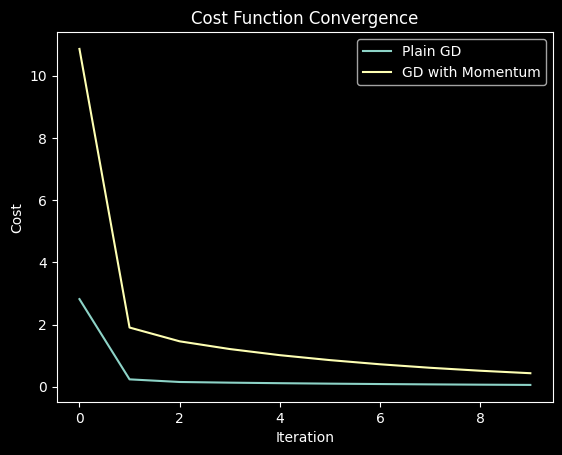

In [3]:
beta_momentum = np.random.randn(X.shape[1], 1)
velocity = np.zeros_like(beta_momentum)
beta_momentum = np.random.randn(X.shape[1], 1)
velocity = np.zeros_like(beta_momentum)
gamma = 0.1  # Momentum coefficient
cost_history_momentum = []

# Gradient descent with Momentum
for i in range(n_iterations):
    y_pred = X @ beta_momentum
    error = y_pred - y
    cost = (1 / len(y)) * np.sum(error**2)
    cost_history_momentum.append(cost)
    gradient = (2 / len(y)) * X.T @ error
    velocity = gamma * velocity + learning_rate * gradient
    beta_momentum -= velocity

plt.plot(range(n_iterations), cost_history, label="Plain GD")
plt.plot(range(n_iterations), cost_history_momentum, label="GD with Momentum")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

## Stockastic Gradient Descent (SGD)

In the context of large datasets, computing the gradient of the cost function using the entire dataset can be computationally expensive. Stockastic Gradient Descent (SGD) addresses this issue by computing the gradient using a single sample or a small batch of samples at each iteration.

The update rule for SGD is:

The idea behind SGD comes from the observation that the cost function which we want to minimize, can almost always be written 
as a sum of cost functions for each individual data point.

$$C(\beta) = \sum_{i=1}^{n} c_i(x_i,\beta)$$

where $C_i(\beta)$ is the cost function for the $i$-th data point.

This in turn implies that the gradient of the cost function can be written as a sum of gradients of the individual data points:

$$\nabla_{\beta} C(\beta) = \sum_{i=1}^{n} \nabla_{\beta} c_i(x_i,\beta)$$

The idea now is to approximate the gradient of the cost function by sum over all data points in one mini-batch picked at random in each iteration. This is called Stochastic Gradient Descent (SGD).

$$\nabla_{\beta} C(\beta)  = \sum_{i=1}^{n} \nabla_{\beta} c_i(x_i,\beta) -> \sum_{i\in B} \nabla_{\beta} c_i(x_i,\beta)$$

where $B$ is the mini-batch of data points.

The update rule for SGD is:

$$ \beta_{j+1} = \beta_j - \eta_j \sum_{i\in B} \nabla_{\beta} c_i(x_i,\beta) $$

where: k is picked at random in each iteration with equal probability.




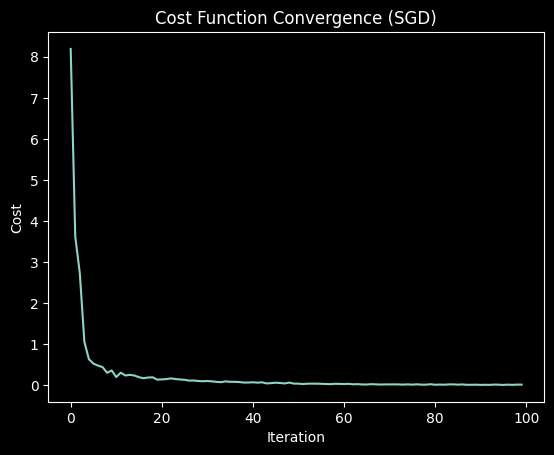

In [20]:

# Parameters for SGD
learning_rate = 0.1        
n_epochs = 5              
n_batches = 20            
batch_size = len(y) // n_batches  # Number of samples in each batch

beta_sgd = np.random.randn(X.shape[1], 1)

cost_history_sgd = []

for _ in range(n_epochs):
    for i in range(n_batches):
        rand_indices = np.random.choice(len(y), batch_size, replace=False)
        X_batch = X[rand_indices]
        y_batch = y[rand_indices]

        y_pred = X_batch @ beta_sgd
        error = y_pred - y_batch
        cost = (1 / len(y_batch)) * np.sum(error**2)
        cost_history_sgd.append(cost)
        gradient = (2 / len(y_batch)) * X_batch.T @ error
        beta_sgd -= learning_rate * gradient

plt.plot(range(len(cost_history_sgd)), cost_history_sgd)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (SGD)")
plt.show()
